In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets


import pickle

name_data_file = 'newExtrapolated_allCorrection.pickle'

with open(name_data_file, "rb") as input_file:
    data = pickle.load(input_file)

data.keys()

dict_keys(['thes', 'dipCUBE', 'smoCube', 'kinCube', 'phis', 'gams', 'geoCUBE', 'potCube'])

In [3]:
from quantumpropagator import fromLabelsToFloats, labTranformA

phis_ext = labTranformA(data['phis'])
gams_ext = labTranformA(data['gams'])
thes_ext = labTranformA(data['thes'])

phiV_ext, gamV_ext, theV_ext = fromLabelsToFloats(data)

# take step
dphi = phis_ext[0] - phis_ext[1]
dgam = gams_ext[0] - gams_ext[1]
dthe = thes_ext[0] - thes_ext[1]

# take range
range_phi = phis_ext[-1] - phis_ext[0]
range_gam = gams_ext[-1] - gams_ext[0]
range_the = thes_ext[-1] - thes_ext[0]


header = '         Labels extr.        internal extr.     dq      range\n'
string = 'Phi -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nGam -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nThe -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'
out = (header + string).format(phiV_ext[-1],phiV_ext[0],phis_ext[-1],phis_ext[0],dphi,range_phi,
                               gamV_ext[-1],gamV_ext[0],gams_ext[-1],gams_ext[0],dgam,range_gam,
                               theV_ext[-1],theV_ext[0],thes_ext[-1],thes_ext[0],dthe,range_the)
print(out)

         Labels extr.        internal extr.     dq      range
Phi ->   0.1250  -0.1450  12.5000 -14.5000  -0.5000  27.0000
Gam ->   0.4294   0.1344  24.6050   7.7030  -0.3070  16.9020
The ->   0.5806   1.2008  66.5340 137.6000   0.4470 -71.0660


# Title
we will try to cut the 3d potential in 1.

In [4]:
potential = data['potCube']
ground = potential[:,:,:,0]
zero_g = ground - np.amin(ground)
# find the minimum
p_min,g_min,t_min = np.unravel_index(zero_g.argmin(), zero_g.shape)


In [5]:
# The three potentials are
p_linear_pot = zero_g[:,g_min,t_min]
g_linear_pot = zero_g[p_min,:,t_min]
t_linear_pot = zero_g[p_min,g_min,:]


In [6]:
p_linear_pot = p_linear_pot

<IPython.core.display.Javascript object>


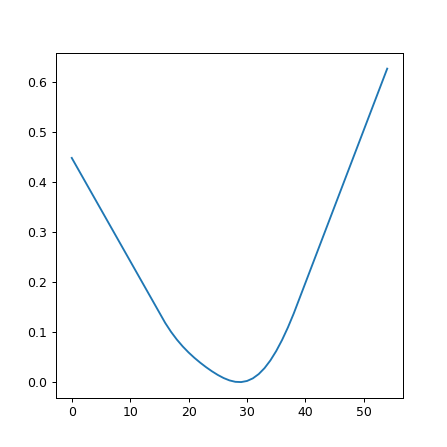

In [7]:
fig = plt.figure(figsize=(5,5))
plt.plot(p_linear_pot);
# plt.plot(g_linear_pot)
# plt.plot(t_linear_pot)


This is along phi. I take the G element of the kin matrix corresponding to the second derivative.

In [8]:
#
kin = data['kinCube']
p_linear_kin = kin[:,g_min,t_min]
p_linear_mu = p_linear_kin[:,0,2]

#
p_delta = -0.005
g_delta = -0.00535816080362
t_delta = 0.00390081087821

In [9]:
# 52 here is [len(phis)-3] -> [55-3] because I insert 3 numbers into the toeplitz matrix

from scipy.linalg import toeplitz
p_matrix = toeplitz([-(5/2), (4/3), -(1/12), *np.zeros(52)])

In [10]:
np.set_printoptions(linewidth=250, edgeitems=5)

In [11]:
p_matrix_divided = p_matrix/(dphi**2)
p_matrix_divided

array([[-10.        ,   5.33333333,  -0.33333333,   0.        ,   0.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  5.33333333, -10.        ,   5.33333333,  -0.33333333,   0.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [ -0.33333333,   5.33333333, -10.        ,   5.33333333,  -0.33333333, ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.33333333,   5.33333333, -10.        ,   5.33333333, ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  -0.33333333,   5.33333333, -10.        , ...,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       ..., 
       [  0.        ,   0.        ,   0.        ,   0.        ,   0.        , ..., -10.        ,   5.33333333,  -0.33333333,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,

In [12]:
# linear mu saved in kin matrix is already 1/mass... this is why here I multiply instead of dividing

new = (p_matrix_divided*p_linear_mu)

# column or rows?

It should be rows -> same value of mu across the same row




In [13]:
new

array([[  8.35513655e-07,  -4.45607283e-07,   2.78504552e-08,  -0.00000000e+00,  -0.00000000e+00, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07,   2.78504552e-08,  -0.00000000e+00, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  2.78504552e-08,  -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07,   2.78504552e-08, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   8.35513655e-07,  -4.45607283e-07, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   8.35513655e-07, ...,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       ..., 
       [ -0.00000

In [14]:
p_linear_pot_diagonal = np.diag(p_linear_pot)

In [33]:
to_diagonalize = p_linear_pot_diagonal + new

In [32]:
p_linear_pot_diagonal = p_linear_pot_diagonal/27.21

In [34]:
to_diagonalize

array([[  1.64959655e-02,  -4.45607283e-07,   2.78504552e-08,   0.00000000e+00,   0.00000000e+00, ...,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -4.45607283e-07,   1.57370222e-02,  -4.45607283e-07,   2.78504552e-08,   0.00000000e+00, ...,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.78504552e-08,  -4.45607283e-07,   1.49780788e-02,  -4.45607283e-07,   2.78504552e-08, ...,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   1.42191355e-02,  -4.45607283e-07, ...,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   2.78504552e-08,  -4.45607283e-07,   1.34601922e-02, ...,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000

In [35]:
eigVal,eigVec = np.linalg.eig(to_diagonalize)

In [36]:
index_min = np.unravel_index(eigVal.argmin(), eigVal.shape) 
eigVal,index_min, eigVal[index_min]

(array([  1.64959657e-02,   1.57370222e-02,   1.49780788e-02,   1.42191355e-02,   1.34601922e-02,   1.27012488e-02,   1.19423055e-02,   1.11833622e-02,   1.04244188e-02,   9.66547550e-03,   8.90653217e-03,   8.14758884e-03,   7.38864551e-03,
          6.62970218e-03,   5.87075885e-03,   5.11181551e-03,   4.35249926e-03,   3.69596593e-03,   3.12314963e-03,   2.62139288e-03,   2.17875665e-03,   1.78328059e-03,   1.42452788e-03,   1.09561912e-03,   7.94765737e-04,   5.25836250e-04,
          2.97926387e-04,   1.24132025e-04,   1.98398581e-05,   8.22615720e-07,   8.17303773e-05,   2.74559455e-04,   5.88023044e-04,   1.02712530e-03,   1.59320345e-03,   2.28420768e-03,   3.09516325e-03,   4.01888026e-03,   5.04733474e-03,
          6.17442986e-03,   7.30040219e-03,   8.42637453e-03,   9.55234686e-03,   1.06783192e-02,   1.18042915e-02,   1.29302639e-02,   1.40562362e-02,   1.51822085e-02,   1.63081809e-02,   1.74341532e-02,   1.85601255e-02,   1.96860979e-02,
          2.08120702e-02,   2.19

In [37]:
eigVec

array([[  9.99999827e-001,  -5.87163050e-004,  -1.81758012e-005,   1.07393752e-008,   1.65170059e-010, ...,   5.40982320e-123,   1.20047563e-125,   8.03659865e-128,   2.64817881e-130,   1.15830858e-132],
       [ -5.87152277e-004,  -9.99999655e-001,   5.87152378e-004,   1.81758043e-005,  -1.07393426e-008, ...,   8.43035944e-117,   6.34667512e-118,   2.35414312e-119,   2.17959756e-121,   3.87796207e-123],
       [  1.85205459e-005,   5.87130831e-004,   9.99999655e-001,  -5.87152378e-004,  -1.81758043e-005, ...,   1.08920432e-115,   9.90708898e-117,   3.72280091e-118,   3.46290488e-120,   6.17596551e-122],
       [ -1.08068771e-008,  -1.85205397e-005,  -5.87130832e-004,  -9.99999655e-001,   5.87152378e-004, ...,  -3.02102850e-111,  -1.38857864e-112,  -4.90539230e-114,  -4.46385208e-116,  -7.87694491e-118],
       [  1.71495440e-010,   1.08066146e-008,   1.85205397e-005,   5.87130832e-004,   9.99999655e-001, ...,  -9.27527416e-110,  -4.17866205e-111,  -1.47159940e-112,  -1.33726937e-114, 

In [38]:
p_gaussian = eigVec[index_min]
p_gaussian, np.linalg.norm(p_gaussian)

(array([ -5.45166582e-66,  -2.85524465e-62,   1.41619628e-59,   7.70457576e-56,  -1.07956275e-54,  -2.91222791e-51,   1.82853511e-49,  -2.60651878e-49,   4.64885701e-46,  -1.18228263e-42,   1.52606626e-41,  -1.22280383e-38,   2.88533303e-36,
         -2.76302191e-35,   6.22025734e-34,   7.56255697e-31,  -3.96713394e-31,  -3.42318553e-29,   3.87024173e-26,  -1.01949433e-24,  -2.31257929e-22,  -2.56431255e-19,  -4.18989985e-17,  -3.85086404e-14,  -4.95030209e-12,  -3.93772303e-09,
         -3.96746719e-07,  -2.41340172e-04,  -2.34202301e-02,   9.99710488e-01,  -5.51027309e-03,   1.05508872e-04,  -1.10120969e-07,  -1.04125246e-09,  -6.03424467e-13,  -3.88107800e-15,  -1.59656091e-18,  -7.98752563e-21,  -2.65333574e-24,
         -1.10567919e-26,  -3.63018600e-30,  -1.56961159e-32,  -5.54974325e-36,  -2.23371117e-38,  -9.98706665e-42,  -1.51462130e-44,   9.69880478e-47,  -5.88491233e-48,   3.34939182e-49,  -2.40577785e-50,  -8.97608137e-51,  -3.55961039e-52,
         -1.77430493e-53,  -2.22

<IPython.core.display.Javascript object>


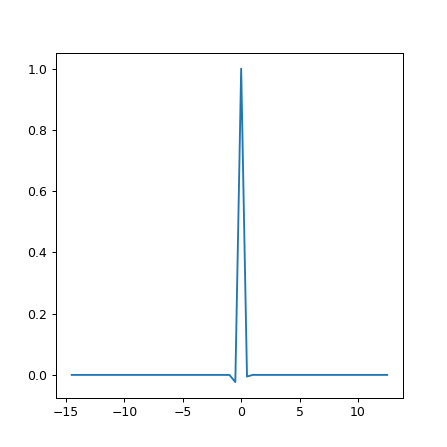

In [39]:
fig = plt.figure(figsize=(5,5))
plt.plot(phis_ext,p_gaussian);

In [43]:
np.sort(eigVal)

array([  8.22615720e-07,   1.98398581e-05,   8.17303773e-05,   1.24132025e-04,   2.74559455e-04,   2.97926387e-04,   5.25836250e-04,   5.88023044e-04,   7.94765737e-04,   1.02712530e-03,   1.09561912e-03,   1.42452788e-03,   1.59320345e-03,
         1.78328059e-03,   2.17875665e-03,   2.28420768e-03,   2.62139288e-03,   3.09516325e-03,   3.12314963e-03,   3.69596593e-03,   4.01888026e-03,   4.35249926e-03,   5.04733474e-03,   5.11181551e-03,   5.87075885e-03,   6.17442986e-03,
         6.62970218e-03,   7.30040219e-03,   7.38864551e-03,   8.14758884e-03,   8.42637453e-03,   8.90653217e-03,   9.55234686e-03,   9.66547550e-03,   1.04244188e-02,   1.06783192e-02,   1.11833622e-02,   1.18042915e-02,   1.19423055e-02,
         1.27012488e-02,   1.29302639e-02,   1.34601922e-02,   1.40562362e-02,   1.42191355e-02,   1.49780788e-02,   1.51822085e-02,   1.57370222e-02,   1.63081809e-02,   1.64959657e-02,   1.74341532e-02,   1.85601255e-02,   1.96860979e-02,
         2.08120702e-02,   2.1938042

In [44]:
eigVal

array([  1.64959657e-02,   1.57370222e-02,   1.49780788e-02,   1.42191355e-02,   1.34601922e-02,   1.27012488e-02,   1.19423055e-02,   1.11833622e-02,   1.04244188e-02,   9.66547550e-03,   8.90653217e-03,   8.14758884e-03,   7.38864551e-03,
         6.62970218e-03,   5.87075885e-03,   5.11181551e-03,   4.35249926e-03,   3.69596593e-03,   3.12314963e-03,   2.62139288e-03,   2.17875665e-03,   1.78328059e-03,   1.42452788e-03,   1.09561912e-03,   7.94765737e-04,   5.25836250e-04,
         2.97926387e-04,   1.24132025e-04,   1.98398581e-05,   8.22615720e-07,   8.17303773e-05,   2.74559455e-04,   5.88023044e-04,   1.02712530e-03,   1.59320345e-03,   2.28420768e-03,   3.09516325e-03,   4.01888026e-03,   5.04733474e-03,
         6.17442986e-03,   7.30040219e-03,   8.42637453e-03,   9.55234686e-03,   1.06783192e-02,   1.18042915e-02,   1.29302639e-02,   1.40562362e-02,   1.51822085e-02,   1.63081809e-02,   1.74341532e-02,   1.85601255e-02,   1.96860979e-02,
         2.08120702e-02,   2.1938042

In [41]:
eigVal[28]

1.9839858068211992e-05

In [42]:
eigVec[28]

array([ -2.11265272e-63,  -9.98278345e-60,   4.61959808e-57,   2.43774287e-53,  -3.45552442e-52,  -9.66494575e-49,   5.28616637e-47,  -5.07599660e-45,   1.34158637e-42,   3.05194712e-39,  -8.77822614e-39,   2.77206967e-36,  -2.38898244e-34,
         1.06024516e-34,   2.56647574e-32,   4.49746122e-29,  -2.16705230e-29,  -1.48893593e-27,   2.95747576e-24,   1.25645120e-22,   1.53214804e-19,   2.43475844e-17,   2.32118570e-14,   2.67168121e-12,   2.12953658e-09,   1.70578114e-07,
         1.04255686e-04,   4.27262801e-03,   9.99716363e-01,   2.34240974e-02,   4.89530531e-04,  -4.37268362e-07,   2.84398883e-09,   1.77733387e-12,   9.45788582e-15,   4.10609358e-18,   1.79885332e-20,   6.16416135e-24,   2.32680232e-26,
         6.80883597e-30,   2.55407371e-32,   8.67814552e-36,   3.23662361e-38,   5.16834560e-42,   2.43744806e-43,  -1.69595815e-45,  -1.19177610e-47,   6.30977147e-49,  -5.60300881e-50,  -7.02932502e-52,   7.29027347e-52,   3.57331192e-53,
         1.90296375e-54,   2.4430441

<IPython.core.display.Javascript object>


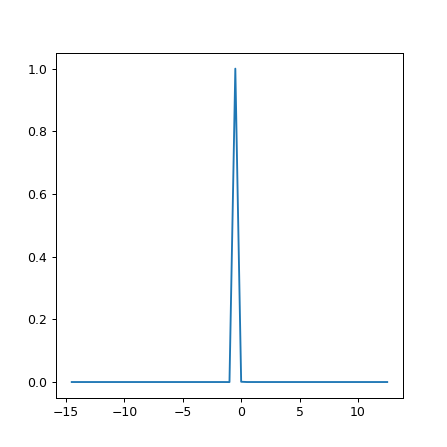

In [27]:
fig = plt.figure(figsize=(5,5))
plt.plot(phis_ext,eigVec[28]);